In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
col = ['k', 'b', 'r', 'g', 'tab:orange', 'm']
mar = ['o', '^', 'v', 's', 'D']

import RPDM

path_data = 'data_bos_1/'
if not os.path.exists(path_data):
    os.mkdir(path_data)
else:
    print(f'WARNING: Directory {path_data} already exists')

In [56]:
Ff = 96485
e_0 = 8.85 * 10**(-12)
R = 8.314
Temp = 293
A_k = 10**(-8)
A_D = 10**(-20)
A_L = 10**(-10)

an1 = 0.2
an2 = 0.1
e_f = 10
e_dl = 10
e_cdl = 78.5
d_dl = 0.5
d_cdl = 1
D_MV = 1
D_OV = 1
k1_0 = 5 * 100   # reactive
k2_0 = 7
k3_0 = 5
k4_0 = 5 * 100   # reactive
k5_0 = 7.5 * 100
k5 = k5_0 * 0.01

A_C = A_k*A_L/A_D
A_t = A_L**2/A_D
A_phi = R*Temp/Ff
phi_ext = 1.5/A_phi

L = 20
T = 12.2
Nx = 401
n_save = 20
Ndata = 800 # or None

id = 1
path = path_data + f'{L:.2f}_{k2_0:.1f}_{phi_ext*A_phi:.1f}_{id}/'

h = L / (Nx-1)
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2) + 1
if Ndata is not None:
    n_save = round(Nt / Ndata)
    if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)

if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

401 19521 815


In [57]:
print(10**5 * 10**(-10) * Ff/R/Temp)
print(d_dl / 20 * 1 * Ff/R/Temp * 0.1)

0.000396079313563782
0.09901982839094549


In [58]:
F = RPDM.Film()

F.Nx = Nx
F.n_save = n_save
F.phi_ext = phi_ext
F.L = L
F.T = T
F.D_MV = D_MV
F.D_OV = D_OV
F.k1_0 = k1_0
F.k2_0 = k2_0
F.k3_0 = k3_0
F.k4_0 = k4_0
F.k5_0 = k5_0
F.an1 = an1
F.an2 = an2
F.e_f = e_f
F.e_dl = e_dl
F.e_cdl = e_cdl
F.d_dl = d_dl
F.d_cdl = d_cdl
F.Temp = Temp
F.Ff = Ff
F.e_0 = e_0
F.R = R
F.A_k = A_k
F.A_D = A_D
F.A_L = A_L
F.A_phi = A_phi

In [59]:
c_M = np.zeros(Nx)
c_O = np.zeros(Nx)
x = np.arange(0, L+h, h)

s = int(0.2*L/h)
c_M[:s] = 340/x[s] * x[:s] / A_C
c_M[s:] = 340 / A_C
c_O[:-s] = (420 - (420-370)/x[-s]*x[:-s]) / A_C
c_O[-s:] = 370*(L - x[-s:])/(L-x[-s]) / A_C

In [60]:
#F.init()
F.init(mode = 2, C_MV_0 = c_M, C_OV_0 = c_O)

27

In [61]:
F.solve()

0

In [71]:
F.save_x(path)
F.save_t(path)
F.save_C_MV(path)
F.save_C_OV(path)
F.save_phi(path)
F.save_E(path)
F.save_k2(path)

# Visualisation

## General

In [62]:
x = F.x
t_data = F.t_data
Data_C_MV = F.Data_C_MV
Data_C_OV = F.Data_C_OV
Data_phi = F.Data_phi
Data_E = F.Data_E
Data_k2 = F.Data_k2

In [73]:
x = np.loadtxt(path+'/x.txt')
t_data = np.loadtxt(path+'/t_data.txt')
Data_C_MV = np.loadtxt(path+'/Data_C_MV.txt')
Data_C_OV = np.loadtxt(path+'/Data_C_OV.txt')
Data_phi = np.loadtxt(path+'/Data_phi.txt')
Data_E = np.loadtxt(path+'/Data_E.txt')
Data_k2 = np.loadtxt(path+'/Data_k2.txt')

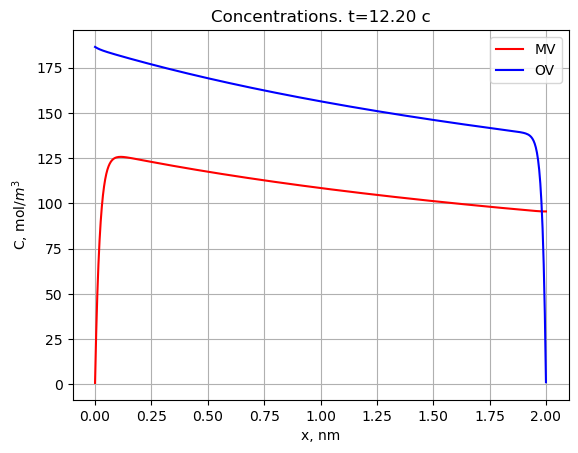

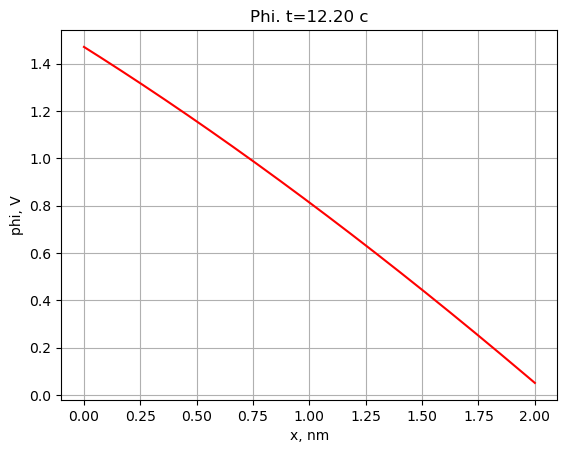

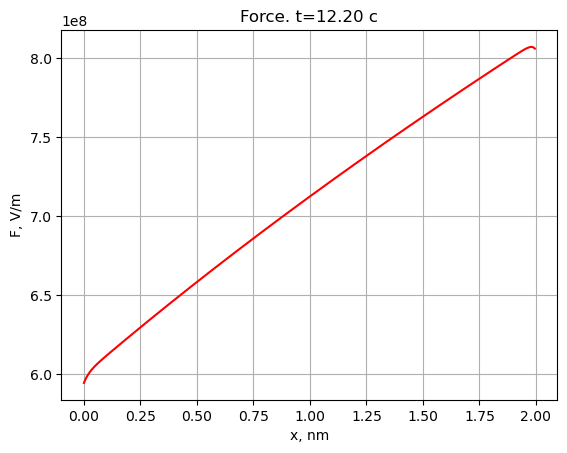

In [69]:
num = -1
plt.plot(x*0.1, Data_C_MV[num]*A_C, 'r', label='MV')
plt.plot(x*0.1, Data_C_OV[num]*A_C, 'b', label='OV')
plt.title(f'Concentrations. t={t_data[num]*A_t:.2f} c')
plt.legend()
plt.xlabel('x, nm')
plt.ylabel(r'C, mol/$m^{3}$')
plt.grid()
#plt.savefig(path+f'C({t_data[num]:.3f}).png', format='png', dpi=300)
plt.show()

plt.plot(x*0.1, A_phi*Data_phi[num], 'r', label='phi')
plt.title(f'Phi. t={t_data[num]*A_t:.2f} c')
plt.xlabel('x, nm')
plt.ylabel('phi, V')
plt.grid()
#plt.savefig(path+f'phi({t_data[num]:.3f}).png', format='png', dpi=300)
plt.show()

plt.plot(x[:-1]*0.1, A_phi/A_L*Data_E[num], 'r', label='F')
plt.title(f'Force. t={t_data[num]*A_t:.2f} c')
plt.xlabel('x, nm')
plt.ylabel('F, V/m')
#plt.ylim([A_phi/A_L*F_min*0.95, A_phi/A_L*F_max*1.05])
plt.grid()
#plt.savefig(path+f'F({t_data[num]:.3f}).png', format='png', dpi=300)
plt.show()

##       $k_2$ plot

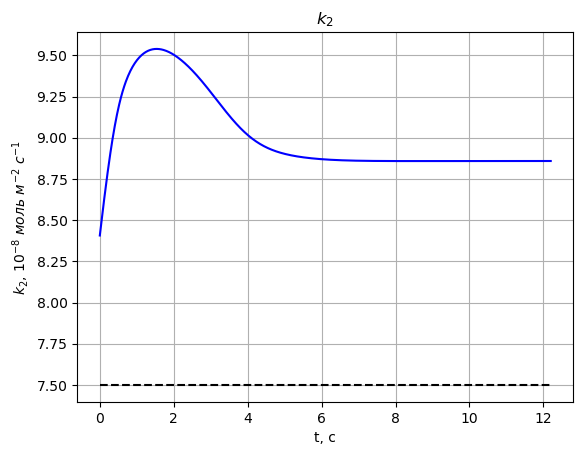

In [64]:
plt.plot(t_data, Data_k2, 'b')
plt.plot([t_data[0], t_data[-1]], [k5, k5], 'k--')
plt.xlabel('t, c')
plt.title(r'$k_2$')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.grid()
#plt.savefig(path+f'k2.png', format='png', dpi=300)
plt.show()

## Concentrarion gifs

In [ ]:
# Concentrarion gifs
Nt_gif = min(4000, Ndata)

C_max = max(np.max(Data_C_MV[:Nt_gif, :]), np.max(Data_C_OV[:Nt_gif, :]))
def update_plot(num):
    plt.cla()
    plt.plot(x*0.1, Data_C_MV[num]*A_c, 'r', label='MV')
    plt.plot(x*0.1, Data_C_OV[num]*A_c, 'b', label='OV')
    plt.title(f'Concentrations. t={t_data[num]*A_t:.3f} c')
    plt.legend()
    plt.ylim([0, A_c * C_max*1.1])
    #plt.xlim([0, L*0.1])
    plt.xlabel('x, нм')
    plt.ylabel(r'C, моль/$м^{3}$')
    plt.grid()

fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
#ani.save(path+'C.gif', writer='pillow', fps=24)

## Potential gifs

In [ ]:
Nt_gif = min(4000, Ndata)

def update_plot(num):
    plt.cla()
    plt.plot(x*0.1, Data_phi[num]*A_phi, 'b')
    plt.title(f'Potential. t={t_data[num]*A_t:.3f} c')
    plt.xlabel('x, нм')
    plt.ylabel(r'$\phi$, В')
    plt.ylim([0, phi_ext*1.1*A_phi])
    plt.grid()
    
fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
#ani.save(path+f'phi.gif', fps=24)

## Electric field gif

In [ ]:
Nt_gif = min(4000, Ndata)

E_max = np.max(Data_E)
E_min = np.min(Data_E)
def update_plot(num):
    plt.cla()
    plt.plot(x[:-1]*0.1, A_phi/A_L*Data_E[num], 'r', label='F')
    plt.title(f'Electric field. t={t_data[num]*A_t:.3f} c')
    plt.xlabel('x, нм')
    plt.ylabel('E, В/м')
    plt.ylim([A_phi/A_L*E_min*0.95, A_phi/A_L*E_max*1.05])
    plt.grid()

fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
#ani.save(path+f'E.gif', fps=24)